# Examples to Bayes decision theory - Solution

by Bjørn Christian Weinbach

An automated fruit sorting system is supposed to discriminate grape fruits from
oranges based on weight measurements of the fruits.

It is known that in a batch of fruit, the proportion of oranges is $60%$ while the
proportion of grape fruits is $40%$. Furthermore, a substantial record of former mea-
surements has shown that the weight of the grape fruits have a gaussian distribution
around the mean value $0.3$kg with a variance of $0.0004$, while the weight of the 
oranges have a gaussian distribution around the mean value of $0.25$ kg with a variance
of $0.0004$

From the summary above, we identify:

$$
\omega_1 = \text{Grape} 
$$
$$
\omega_2 = \text{Orange}
$$
$$
P(\omega_1) = 0.4
$$
$$
P(\omega_2) = 0.6
$$
$$
p(\boldsymbol{x}|\omega_1) \sim N(0.3, 0.0004)
$$
$$
p(\boldsymbol{x}|\omega_2) \sim N(0.25, 0.0004)
$$

## Imports

In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

a) Sketch the two class specifc probability density functions in the same diagram. 


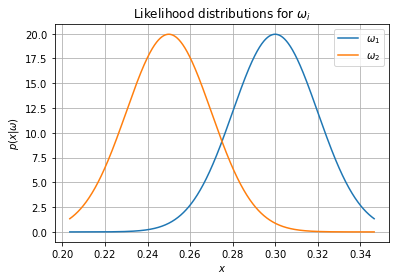

In [2]:
# Priors
prior1 = stats.norm(loc=0.3, scale=np.sqrt(0.0004))
prior2 = stats.norm(loc=0.25, scale=np.sqrt(0.0004))

# Plot
fig, ax = plt.subplots()

x = np.linspace(
        min(prior1.ppf(0.01), prior2.ppf(0.01)),
        max(prior1.ppf(0.99), prior2.ppf(0.99)),
        1000        
    )

ax.plot(x, prior1.pdf(x), label="$\omega_1$")
ax.plot(x, prior2.pdf(x), label="$\omega_2$")
ax.set_xlabel('$x$')
ax.set_ylabel('$p(x|\omega)$')
ax.set_title('Likelihood distributions for $\omega_i$')
ax.legend()
ax.grid()

b) Estimate á-priori probabilities

A reasonable prior (given no evidence) distribution is to assume that the distribution is the proportion of the different classes.

This gives us

$$
P(\omega_i) = 
\begin{cases}
    0.6 & \omega_i = \omega_1 \\
    0.4 & \omega_i = \omega_2 
\end{cases}
$$

c) Formulate Bayes decision rule for this problem and indicate the decision border
and the decision region for each class in the diagram from a).

To decide which class a feature vector $\boldsymbol{x}$. Bayes classification rule tells us that we should select the class
which has the highest posterior probability.

formalsed as:

$$
\text{Assign } \boldsymbol{x} \text{ to } \omega_i = 
\underset{\omega_j}{\operatorname{arg max}} P(\omega_j|\boldsymbol{x}), 
\quad j = 1, 2, \dots M, 
$$

Using bayes classification rule, we want to choose the class that has the highest posterior distribution and
the decision boundary is the point where the probability is equal

mathematically:

$$
    P(\omega_1 | \boldsymbol{x}) = P(\omega_2 | \boldsymbol{x})
$$

Setting the posteriors equal to one another yields (employing bayes theorem and omitting $p(\boldsymbol{x)}$)):

$$
\frac{0.6}{\sqrt{2\pi}0.02}e^{\frac{(x - 0.25)^2}{0.0008}} = \frac{0.4}{\sqrt{2\pi}0.02}e^{\frac{(x - 0.30)^2}{0.0008}}
$$

Which is true in the case $x=0.278$ and we have $\omega_1$ if $x < 0.278$ and $\omega_2$ otherwise.

Graphically:

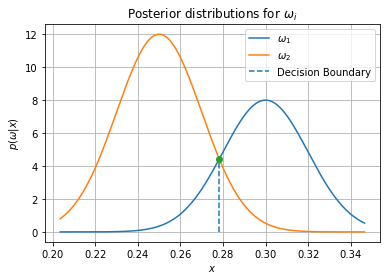

In [12]:
# Intersection
idx = int(np.argwhere(
    np.diff(np.sign(0.4*prior1.pdf(x) - 0.6*prior2.pdf(x)))
    ).flatten())

# Plot
fig, ax = plt.subplots()
ax.plot(x, 0.4*prior1.pdf(x), label="$\omega_1$")
ax.plot(x, 0.6*prior2.pdf(x), label="$\omega_2$")

ax.set_xlabel('$x$')
ax.set_ylabel('$p(\omega|x)$')
ax.set_title('Posterior distributions for $\omega_i$')
ax.plot(x[idx], 0.4*prior1.pdf(x[idx]), marker='o')
ax.vlines(x[idx], ymin=0, ymax=0.4*prior1.pdf(x[idx]), linestyles='dashed', label="Decision Boundary")
ax.legend()
ax.grid()

d) Shade the regions in the diagram that contributes to the error probability and
compute its value.

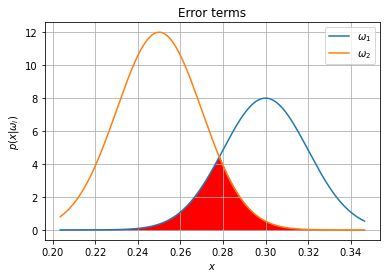

In [4]:
# Plot
fig, ax = plt.subplots()
ax.plot(x, 0.4*prior1.pdf(x), label="$\omega_1$")
ax.plot(x, 0.6*prior2.pdf(x), label="$\omega_2$")

ax.set_xlabel('$x$')
ax.set_ylabel('$p(x|\omega_i)$')
ax.set_title('Error terms')
ax.fill_between(x[:idx], 0.4*prior1.pdf(x[:idx]), y2=0, color='red')
ax.fill_between(x[idx:], 0.6*prior2.pdf(x[idx:]), y2=0, color='red')
ax.legend()
ax.grid()

To calculate this error we use the formula

$$
P_e = P(\omega_2)\int_{R_1} p(\boldsymbol{x}|\omega_2) + P(\omega_1)\int_{R_2} p(\boldsymbol{x}|\omega_1)
$$

Which is the probability of being classified in the wrong class for each decision region.
In python:

In [5]:
0.6*(1-prior2.cdf(x[idx])) + 0.4*prior1.cdf(x[idx])

0.10270413703761457

d) Repeat the computations in c) and d) when the á priori probabilities in b) are
equal.

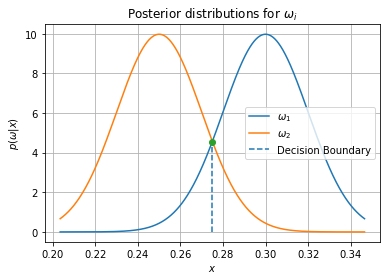

In [6]:
# Intersection
idx = int(np.argwhere(
    np.diff(np.sign(0.5*prior1.pdf(x) - 0.5*prior2.pdf(x)))
    ).flatten())

# Plot
fig, ax = plt.subplots()
ax.plot(x, 0.5*prior1.pdf(x), label="$\omega_1$")
ax.plot(x, 0.5*prior2.pdf(x), label="$\omega_2$")

ax.set_xlabel('$x$')
ax.set_ylabel('$p(\omega|x)$')
ax.set_title('Posterior distributions for $\omega_i$')
ax.plot(x[idx], 0.5*prior1.pdf(x[idx]), marker='o')
ax.vlines(x[idx], ymin=0, ymax=0.5*prior1.pdf(x[idx]), linestyles='dashed', label="Decision Boundary")
ax.legend()
ax.grid()

X value of intersection:

In [7]:
x[idx]

0.27492840144396313

Error rate then becomes

In [8]:
0.5*(1-prior2.cdf(x[idx])) + 0.5*prior1.cdf(x[idx])

0.10565123667043463